https://setosa.io/ev/image-kernels/

Notes:
http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L3.pdf

# Dataset 

https://ceb.nlm.nih.gov/repositories/malaria-datasets/

#### Reduce the burden for microscopists in resource-constrained regions and improve diagnostic accuracy,
* the images were manually annotated by an expert slide reader at the Mahidol-Oxford Tropical Medicine Research Unit in Bangkok, Thailand.

In [1]:
import os

# initialize the path to the original input directory of images
data_dir='data/cell_images/cell_images'
os.listdir(data_dir)

['test', 'train']

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread


In [ ]:
# derive the training, validation, and testing directories

In [3]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [4]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [5]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [6]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

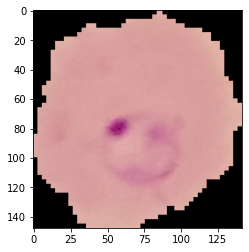

In [7]:
parasite_cell=train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'
plt.imshow(imread(parasite_cell))


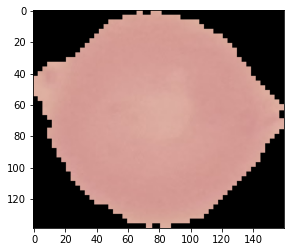

In [8]:
unifected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

In [9]:
len(os.listdir(train_path+'\\parasitized'))

12480

In [10]:
len(os.listdir(train_path+'\\uninfected'))

12480

In [11]:
unifected_cell.shape

(139, 160, 3)

### How to check dimensions of all images in a directory using python?


In [11]:
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


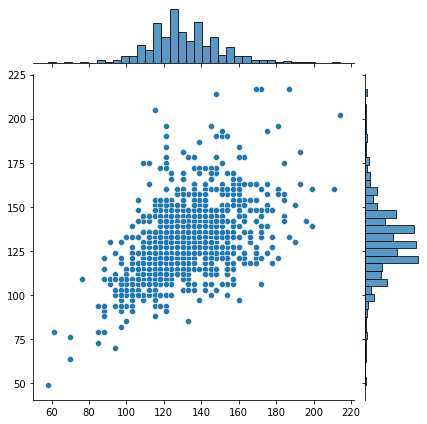

In [12]:
sns.jointplot(dim1,dim2)

In [13]:
np.mean(dim1)

130.92538461538462

In [14]:
np.mean(dim2)

130.75

In [15]:
image_shape = (130,130,3)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

* image preprosessing 
* Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data 


In [56]:
#help(ImageDataGenerator)
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [23]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [24]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Create the Model

*  relu : rectifier function to increase non-linearity in the CNN. Images are made of different objects that are not linear to each other. Without applying this function the image classification will be treated as a linear problem while it is actually a non-linear one
*  Pooling enables the CNN to detect features in various images irrespective of the difference in lighting in the pictures and different angles of the images.
* . Max pooling works by placing a matrix of 2x2 on the feature map and picking the largest value in that box
*  Flattening : Flattening involves transforming the entire pooled feature map matrix into a single column which is then fed to the neural network for processing.

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [26]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()


# relu : rectifier function to increase non-linearity in the CNN. Images are made of different objects that are not linear to each other. Without applying this function the image classification will be treated as a linear problem while it is actually a non-linear one

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))

 Pooling enables the CNN to detect features in various images irrespective of the difference in lighting in the pictures and different angles of the images.
# . Max pooling works by placing a matrix of 2x2 on the feature map and picking the largest value in that box

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

#  Flattening : Flattening involves transforming the entire pooled feature map matrix into a single column which is then fed to the neural network for processing.
model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [28]:
# Stop training when a monitored metric has stopped improving. Assuming the goal of a training is to minimize the loss.
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [29]:
batch_size = 16

In [30]:
#  Keras has this ImageDataGenerator class which allows the users to perform image augmentation on the fly in a very easy way.
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [31]:
# Keras has this ImageDataGenerator class which allows the users to perform image augmentation on the fly in a very easy way.
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [32]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [33]:
%%time
results = model.fit_generator(train_image_gen,epochs=3,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

C:\Users\John\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
1560/1560 [==============================] - 539s 345ms/step - loss: 0.4118 - accuracy: 0.7919 - val_loss: 0.1880 - val_accuracy: 0.9392
Epoch 2/3
1560/1560 [==============================] - 364s 233ms/step - loss: 0.1797 - accuracy: 0.9444 - val_loss: 0.2215 - val_accuracy: 0.9246
Epoch 3/3
1560/1560 [==============================] - 364s 233ms/step - loss: 0.1654 - accuracy: 0.9493 - val_loss: 0.1619 - val_accuracy: 0.9442
Wall time: 21min 7s


In [34]:
from tensorflow.keras.models import load_model
model.save('malaria_model.h5')

In [35]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

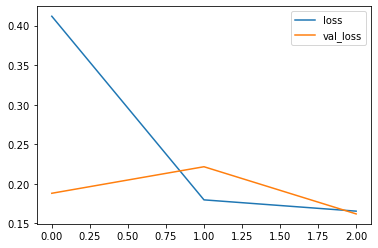

In [36]:
losses[['loss','val_loss']].plot()

In [37]:
model.evaluate_generator(test_image_gen)

C:\Users\John\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.16004852950572968, 0.9438461661338806]

In [38]:
from tensorflow.keras.preprocessing import image

In [39]:
pred_probabilities = model.predict_generator(test_image_gen)

C:\Users\John\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [40]:
pred_probabilities

array([[7.2702765e-04],
       [3.1754375e-04],
       [1.0957122e-03],
       ...,
       [9.1841894e-01],
       [9.6554500e-01],
       [9.2585289e-01]], dtype=float32)

In [41]:
predictions = pred_probabilities > 0.5

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1300
           1       0.94      0.95      0.95      1300

    accuracy                           0.94      2600
   macro avg       0.95      0.94      0.94      2600
weighted avg       0.95      0.94      0.94      2600



In [44]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1222,   78],
       [  65, 1235]], dtype=int64)

### Predicting image 

In [45]:
# image path 
parasite_cell

'data/cell_images/cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [46]:
# load image
my_image = image.load_img(parasite_cell,target_size=image_shape)

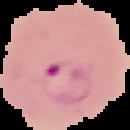

In [47]:
my_image

In [48]:
# convert image to numpy array
my_image = image.img_to_array(my_image)

In [49]:
my_image.shape

(130, 130, 3)

In [50]:
my_image = np.expand_dims(my_image, axis=0)

In [51]:
my_image.shape

(1, 130, 130, 3)

In [58]:
# predict 
pred=model.predict(my_image)
pred

array([[0.]], dtype=float32)

In [53]:
# class index
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [54]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}